# Methodologies  

1. Data Import & Exploration  
2. Identifying Data and Attributes  
3. Determining the Type of Dataset  
4. Data Quality Assessment  
5. Quantitative Statistics  
6. Application of Proximity (Distance Analysis)  
7. Data Mining: Association Rule Mining  


# Data Import & Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fredapi import Fred
import calendar
import holidays

In [2]:

# Read the CSV file
file_path = 'data/wfp_food_prices_phl.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df

/tmp/ipykernel_38450/2812996776.py:3: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.0,0.3717
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.0,0.4461
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123090,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Calamansi,KG,aggregate,Retail,PHP,71.67,1.4949
123091,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Eggplants,KG,aggregate,Retail,PHP,103.33,2.1555
123092,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Onions (red),KG,aggregate,Retail,PHP,114.17,2.3814
123093,2021-02-15,Region XIII,Agusan del Norte,Butuan City,8.957268,125.534029,vegetables and fruits,Papaya,KG,aggregate,Retail,PHP,45.0,0.9387


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123095 entries, 0 to 123094
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       123095 non-null  object
 1   admin1     123095 non-null  object
 2   admin2     123095 non-null  object
 3   market     123095 non-null  object
 4   latitude   123095 non-null  object
 5   longitude  123095 non-null  object
 6   category   123095 non-null  object
 7   commodity  123095 non-null  object
 8   unit       123095 non-null  object
 9   priceflag  123095 non-null  object
 10  pricetype  123095 non-null  object
 11  currency   123095 non-null  object
 12  price      123095 non-null  object
 13  usdprice   123095 non-null  object
dtypes: object(14)
memory usage: 13.1+ MB


In [4]:
df = df.drop(index=0).reset_index(drop=True)

In [5]:
# Filter rows where 'priceflag' is either 'actual' or 'aggregate'
filtered_df = df[df['priceflag'].isin(['actual,aggregate'])]

# Display the filtered rows
filtered_df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
119530,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Potatoes (Irish),KG,"actual,aggregate",Retail,PHP,86.16,1.7011
119531,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (premium),KG,"actual,aggregate",Retail,PHP,46.13,0.9108
119532,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,"actual,aggregate",Retail,PHP,36.65,0.7236
119533,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Rice (special),KG,"actual,aggregate",Retail,PHP,53.23,1.0509
119534,2020-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Eggs,Unit,"actual,aggregate",Retail,PHP,6.83,0.1348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119949,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Calamansi,KG,"actual,aggregate",Retail,PHP,99.45,2.0744
119950,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Ginger,KG,"actual,aggregate",Retail,PHP,156.65,3.2676
119951,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Mangoes (carabao),KG,"actual,aggregate",Retail,PHP,197.03,4.11
119952,2021-02-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,vegetables and fruits,Onions (red),KG,"actual,aggregate",Retail,PHP,111.64,2.3287


In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
duplicate_rows

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice


In [7]:
categorical_cols = [
    "date", "admin1", "admin2", "market", 
    "category", "commodity", "unit", "priceflag", 
    "pricetype", "currency"
]

numerical_cols = ["latitude", "longitude", "price", "usdprice"]

In [8]:
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)
    

Value counts for 'date':
date
2020-07-15    2795
2020-10-15    2790
2020-08-15    2782
2020-05-15    2745
2020-11-15    2743
              ... 
2020-02-15      18
2019-06-15      18
2004-02-15      18
2019-12-15      16
2019-11-15      16
Name: count, Length: 299, dtype: int64
----------------------------------------
Value counts for 'admin1':
admin1
Region III                              10625
Region VI                                9119
Region V                                 8893
Region VIII                              8525
Cordillera Administrative region         8287
Region XI                                8202
Region X                                 7190
Region IV-B                              7122
Region IV-A                              7084
Region XII                               6996
Region XIII                              6930
Region VII                               6681
Region I                                 6205
Region II                                6151
Reg

In [9]:
print("Descriptive statistics for numerical columns:")
print(df[numerical_cols].describe())

Descriptive statistics for numerical columns:
       latitude longitude   price usdprice
count    123094    123094  123094   123094
unique      192       190   24478    54978
top        7.18    125.44    30.0   0.8092
freq       2438      2438     474       32


In [10]:
df.isnull().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

# Data Dictionary

In [11]:
# Data dictionary descriptions for the columns (Updated variable names)
data_descriptions = {
    "date": "Date when the price was recorded",
    "admin1": "First administrative division (region) where the market is located",
    "admin2": "Second administrative division (city) where the market is located",
    "market": "Name of the specific market where the commodity was recorded",
    "latitude": "Latitude coordinate of the market’s location",
    "longitude": "Longitude coordinate of the market’s location",
    "category": "General category to which the commodity belongs (e.g., 'oil and fats', 'cereals and tubers')",
    "commodity": "Specific item being traded (e.g., rice, wheat, tomatoes)",
    "unit": "Measurement unit of the commodity (e.g., kg, liter, piece)",
    "priceflag": "Flag indicating the reliability or nature of the price data (e.g., actual, aggregate)",
    "pricetype": "Type of price recorded (e.g., wholesale, retail, farmgate)",
    "currency": "Currency in which the price was recorded (e.g., USD, PHP)",
    "price": "Recorded price of the commodity in its local currency",
    "usdprice": "Price of the commodity converted into USD"
}


# Create the data dictionary DataFrame
data_dictionary = pd.DataFrame({
    'Column Name': df.columns,
    'Description': [data_descriptions.get(col, 'No description available') for col in df.columns],
    'Data Type': df.dtypes.values
})

# Display the data dictionary
data_dictionary


,Column Name,Description,Data Type
0,date,Date when the price was recorded,object
1,admin1,First administrative division (region) where t...,object
2,admin2,Second administrative division (city) where th...,object
3,market,Name of the specific market where the commodit...,object
4,latitude,Latitude coordinate of the market’s location,object
5,longitude,Longitude coordinate of the market’s location,object
6,category,General category to which the commodity belong...,object
7,commodity,"Specific item being traded (e.g., rice, wheat,...",object
8,unit,"Measurement unit of the commodity (e.g., kg, l...",object
9,priceflag,Flag indicating the reliability or nature of t...,object


# Identifying Data and Attributes

In [12]:
import pandas as pd

# --- Convert Data Types ---
# Convert 'date' to datetime (invalid formats become NaT)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert latitude and longitude to numeric (float)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Convert price and usdprice to numeric (float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# --- Validate Reasonable Values ---
# Define valid conditions for each column:
valid_date = df['date'].notna()  # Date is valid if not NaT

# Add condition to only include dates on or after January 1, 2019
valid_start_date = df['date'] >= pd.Timestamp('2019-01-01')

# Latitude: valid if not NaN and between -90 and 90
valid_lat = df['latitude'].notna() & (df['latitude'] >= -90) & (df['latitude'] <= 90)

# Longitude: valid if not NaN and between -180 and 180
valid_lon = df['longitude'].notna() & (df['longitude'] >= -180) & (df['longitude'] <= 180)

# Price: valid if not NaN and non-negative
valid_price = df['price'].notna() & (df['price'] >= 0)

# usdprice: valid if not NaN and non-negative
valid_usdprice = df['usdprice'].notna() & (df['usdprice'] >= 0)

# Combine all conditions: only rows meeting all criteria are valid
all_valid = valid_date & valid_start_date & valid_lat & valid_lon & valid_price & valid_usdprice

# --- Create a New DataFrame with Only Valid Rows ---
df_cleaned = df[all_valid].copy()

print("Number of rows before cleaning:", len(df))
print("Number of rows after cleaning:", len(df_cleaned))


Number of rows before cleaning: 123094
Number of rows after cleaning: 100921


In [13]:
import pandas as pd
import numpy as np

# Ensure 'date' is a datetime object
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Create a 'month' column as a Period (year-month)
df_cleaned['month'] = df_cleaned['date'].dt.to_period('M')

# Function to find missing months for a group
def find_missing_months(group):
    # Determine the full range of months between the min and max month in the group
    full_range = pd.period_range(start=group['month'].min(), end=group['month'].max(), freq='M')
    # Get the unique months present in the group
    present = group['month'].unique()
    # Find missing months (set difference)
    missing = full_range.difference(present)
    return pd.Series({'missing_months': missing, 'num_missing': len(missing)})

# Group by commodity, admin1, and market and apply the function
missing_df = df_cleaned.groupby(['commodity', 'admin1', 'market']).apply(find_missing_months).reset_index()

# Display groups with missing months (i.e., where num_missing > 0)
missing_groups = missing_df[missing_df['num_missing'] > 0]
print("Groups with missing months:")
print(missing_groups)

Groups with missing months:
          commodity                                admin1             market  \
0         Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1         Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2         Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3         Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4         Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
...             ...                                   ...                ...   
5053  Water spinach                            Region XII     Sultan Kudarat   
5054  Water spinach                           Region XIII   Agusan del Norte   
5055  Water spinach                           Region XIII     Agusan del Sur   
5056  Water spinach                           Region XIII  Surigao del Norte   
5057  Water spinach                           Region XIII    Surigao del Sur   

           

/tmp/ipykernel_38450/3825591094.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_df = df_cleaned.groupby(['commodity', 'admin1', 'market']).apply(find_missing_months).reset_index()


In [14]:
# Mark groups as missing or complete based on the number of missing months
missing_df['has_missing'] = missing_df['num_missing'] > 0

# Merge this indicator back with some aggregated statistics from your original data
group_stats = df_cleaned.groupby(['commodity', 'admin1', 'market']).agg({
    'price': ['mean', 'std'],
    'latitude': ['mean'],
    'longitude': ['mean']
}).reset_index()

group_stats.columns = ['commodity', 'admin1', 'market', 'price_mean', 'price_std', 'latitude', 'longitude']

# Merge with missing indicator
group_stats = pd.merge(group_stats, missing_df[['commodity', 'admin1', 'market', 'has_missing']], on=['commodity', 'admin1', 'market'], how='left')
group_stats['has_missing'] = group_stats['has_missing'].fillna(False)

print(group_stats.head(10))

   commodity                                admin1             market  \
0  Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1  Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2  Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3  Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4  Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
5  Anchovies      Cordillera Administrative region            Benguet   
6  Anchovies      Cordillera Administrative region  Mountain Province   
7  Anchovies               National Capital region       Metro Manila   
8  Anchovies                              Region I       Ilocos Norte   
9  Anchovies                              Region I         Ilocos Sur   

   price_mean  price_std   latitude   longitude  has_missing  
0  133.406571  37.487119   6.663056  122.136111         True  
1  112.138182  12.000940   7.996562  124.279092         True  
2  142.

In [16]:
import pandas as pd
import numpy as np

# --- Assume your missing_df is computed as before, which includes:
# 'commodity', 'admin1', 'market', 'missing_months', and 'num_missing'

# Create a binary indicator for missingness for each group:
missing_df['has_missing'] = missing_df['num_missing'] > 0

# Now, compute some group-level statistics from the original data.
# For example, compute the mean values for key variables for each (commodity, admin1, market) group.
group_stats = (
    df_cleaned.groupby(['commodity', 'admin1', 'market'])
             .agg({
                 'price': 'mean',
                 'latitude': 'mean',
                 'longitude': 'mean'
             })
             .reset_index()
)

# Merge the missingness indicator into the group-level stats.
group_stats = group_stats.merge(
    missing_df[['commodity', 'admin1', 'market', 'has_missing']],
    on=['commodity', 'admin1', 'market'],
    how='left'
)

# Fill missing has_missing with False (if any groups didn't appear in missing_df)
group_stats['has_missing'] = group_stats['has_missing'].fillna(False)

print("Group-level statistics with missingness indicator:")
print(group_stats.head(10))

# Now, convert the boolean missing indicator to a numeric variable (0/1)
group_stats['missing_numeric'] = group_stats['has_missing'].astype(int)

# Compute correlations between the missingness indicator and the key variables.
corr_matrix = group_stats[['price', 'latitude', 'longitude', 'missing_numeric']].corr()
print("\nCorrelation matrix between group-level variables and missingness:")
print(corr_matrix)

# Interpretation:
# - If 'missing_numeric' shows little or no correlation with the key variables, this suggests missingness is closer to MCAR.
# - If there are significant correlations (positive or negative), this suggests missingness might be MAR.


Group-level statistics with missingness indicator:
   commodity                                admin1             market  \
0  Anchovies  Autonomous region in Muslim Mindanao            Basilan   
1  Anchovies  Autonomous region in Muslim Mindanao      Lanao del Sur   
2  Anchovies  Autonomous region in Muslim Mindanao        Maguindanao   
3  Anchovies  Autonomous region in Muslim Mindanao               Sulu   
4  Anchovies  Autonomous region in Muslim Mindanao          Tawi-Tawi   
5  Anchovies      Cordillera Administrative region            Benguet   
6  Anchovies      Cordillera Administrative region  Mountain Province   
7  Anchovies               National Capital region       Metro Manila   
8  Anchovies                              Region I       Ilocos Norte   
9  Anchovies                              Region I         Ilocos Sur   

        price   latitude   longitude  has_missing  
0  133.406571   6.663056  122.136111         True  
1  112.138182   7.996562  124.279092     

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency  # Optional: for a formal test

# --- Assume missing_exploded is already defined ---
# 
# should contain at least:
# 'commodity', 'admin1', 'market', and 'missing_months' (with strings like "2020-09")

# Helper function to safely convert period strings to a Timestamp (using the 1st day of the month)
def safe_convert_to_date(period_str):
    if pd.isna(period_str) or period_str == 'NaT':
        return pd.NaT
    try:
        return pd.to_datetime(period_str + '-01', format='%Y-%m-%d', errors='coerce')
    except Exception as e:
        return pd.NaT

# Convert the 'missing_months' column to actual dates (we use the 1st day for conversion)
missing_exploded['missing_date'] = missing_exploded['missing_months'].apply(safe_convert_to_date)

# Drop rows where conversion failed
missing_exploded = missing_exploded.dropna(subset=['missing_date'])

# Define a function to assign pandemic phase based on a date
def assign_pandemic_phase(date):
    if date < pd.Timestamp('2020-03-01'):
        return "Pre-pandemic"
    elif date < pd.Timestamp('2022-01-01'):
        return "Pandemic"
    else:
        return "Post-pandemic"

# Apply the function to create a new column for the missing month's pandemic phase
missing_exploded['missing_pandemic_phase'] = missing_exploded['missing_date'].apply(assign_pandemic_phase)

# Group by the missing pandemic phase and count how many missing months fall into each phase
missing_phase_counts = missing_exploded.groupby('missing_pandemic_phase').size().reset_index(name='missing_count')

# Compute the percentage of missing months per phase
total_missing = missing_exploded.shape[0]
missing_phase_counts['percent'] = 100 * missing_phase_counts['missing_count'] / total_missing

print("Missing months counts by pandemic phase:")
print(missing_phase_counts)


Missing months counts by pandemic phase:
  missing_pandemic_phase  missing_count    percent
0               Pandemic          24442  41.108700
1          Post-pandemic          34151  57.438149
2           Pre-pandemic            864   1.453151


In [22]:
import pandas as pd
import numpy as np

# Ensure 'date' is a datetime object and create a 'month' column as a Period (year-month)

df_cleaned['month'] = df_cleaned['date'].dt.to_period('M')

# Define the numeric columns for which you'll impute values
numeric_cols = ['price']

# Define the grouping keys
group_keys = ['commodity', 'admin1', 'market', 'latitude', 'longitude']

# List to store imputed rows
imputed_rows = []

# For each combination of commodity, admin1, and market...
for name, group in df_cleaned.groupby(group_keys):
    # Create the full range of months between the earliest and latest month in the group
    full_range = pd.period_range(start=group['month'].min(), end=group['month'].max(), freq='M')
    # Unique months present in the group
    present = group['month'].unique()
    # Determine missing months (set difference)
    missing = full_range.difference(present)
    
    # If there are missing months, impute a row for each missing month
    if len(missing) > 0:
        # Compute the median for each numeric column within this group
        group_medians = group[numeric_cols].median()
        for m in missing:
            # Build a new row as a dictionary with group keys
            new_row = {key: value for key, value in zip(group_keys, name)}
            new_row['month'] = m
            # Convert the period to a Timestamp; here we set the day to the 15th of the month
            new_row['date'] = m.to_timestamp() + pd.offsets.Day(14)
            # Fill numeric columns with the group medians
            for col in numeric_cols:
                new_row[col] = group_medians[col]
            imputed_rows.append(new_row)

# Create a DataFrame of imputed rows
df_imputed = pd.DataFrame(imputed_rows)

# Optionally, combine the imputed rows with your original DataFrame
df_combined = pd.concat([df_cleaned, df_imputed], ignore_index=True)

print("Number of imputed rows:", len(df_imputed))
print("Combined data shape:", df_combined.shape)
print(df_imputed.head())


Number of imputed rows: 59457
Combined data shape: (160378, 15)
   commodity                                admin1   market  latitude  \
0  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   
1  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   
2  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   
3  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   
4  Anchovies  Autonomous region in Muslim Mindanao  Basilan  6.663056   

    longitude    month       date   price  
0  122.136111  2020-10 2020-10-15  116.25  
1  122.136111  2021-04 2021-04-15  116.25  
2  122.136111  2021-07 2021-07-15  116.25  
3  122.136111  2021-08 2021-08-15  116.25  
4  122.136111  2021-10 2021-10-15  116.25  


In [23]:
# Extract month from the date
df_cleaned['month'] = df_cleaned['date'].dt.month

# Convert month to cyclic features
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)


In [24]:
central_lat = 14.5995   # Example: Latitude for Manila, Philippines
central_lon = 120.9842  # Example: Longitude for Manila, Philippines

# Define the Haversine function to compute distance in kilometers
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Earth's radius in kilometers (6371 km)
    km = 6371 * c
    return km

df_cleaned['distance_from_central'] = haversine_distance(central_lat, central_lon, df_cleaned['latitude'], df_cleaned['longitude'])

print(df_cleaned[['market', 'latitude', 'longitude', 'distance_from_central']].tail())

             market  latitude   longitude  distance_from_central
123089  Butuan City  8.957268  125.534029             799.170559
123090  Butuan City  8.957268  125.534029             799.170559
123091  Butuan City  8.957268  125.534029             799.170559
123092  Butuan City  8.957268  125.534029             799.170559
123093  Butuan City  8.957268  125.534029             799.170559


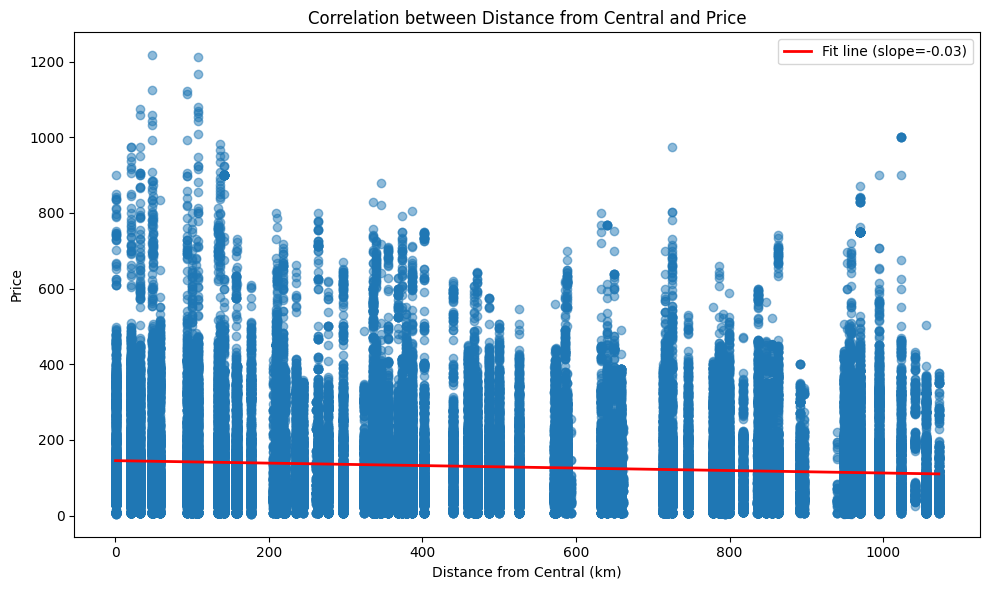

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['distance_from_central'], df_cleaned['price'], alpha=0.5)
plt.xlabel('Distance from Central (km)')
plt.ylabel('Price')
plt.title('Correlation between Distance from Central and Price')

slope, intercept = np.polyfit(df_cleaned['distance_from_central'], df_cleaned['price'], 1)
x_vals = np.array([df_cleaned['distance_from_central'].min(), df_cleaned['distance_from_central'].max()])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2, label=f'Fit line (slope={slope:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
def determine_climate_season(date):
    month = date.month
    if 6 <= month <= 11:
        return "Rainy Season"
    elif month in [12, 1, 2]:
        return "Cool Dry Season"
    elif month in [3, 4, 5]:
        return "Hot Dry Season"
    else:
        return "Unknown"  # Fallback in case of unexpected values

df_cleaned['climate_season'] = df_cleaned['date'].apply(determine_climate_season)


In [26]:
# --- Retrieve USD-PHP Exchange Rate Data from FRED ---
fred = Fred(api_key='3acdf33d996d4189da7cb3843f1c5023') 

# Retrieve the exchange rate series from FRED using NBPHBIS (USD-PHP exchange rate)
exchange_series = fred.get_series('NBPHBIS', observation_start='2019-01-01', observation_end='2025-01-15')

df_exchange = exchange_series.to_frame(name='usd_exchange_rate')
df_exchange.index = pd.to_datetime(df_exchange.index)

# --- Process Exchange Rate Data ---
df_exchange_monthly = df_exchange.resample('M').mean().reset_index()
df_exchange_monthly['date'] = df_exchange_monthly['index'].apply(lambda d: d.replace(day=15))
df_exchange_final = df_exchange_monthly[['date', 'usd_exchange_rate']]

print("Exchange Rate Data (first 5 rows):")
print(df_exchange_final.head())

df_merged = pd.merge(df_cleaned, df_exchange_final, on='date', how='left')

print("\nMerged Data with Exchange Rate (last 5 rows):")
print(df_merged.tail())


Exchange Rate Data (first 5 rows):
        date  usd_exchange_rate
0 2019-01-15              93.76
1 2019-02-15              94.16
2 2019-03-15              93.74
3 2019-04-15              94.87
4 2019-05-15              95.28

Merged Data with Exchange Rate (last 5 rows):
             date       admin1            admin2       market  latitude  \
100916 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100917 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100918 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100919 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   
100920 2021-02-15  Region XIII  Agusan del Norte  Butuan City  8.957268   

         longitude               category     commodity unit  priceflag  \
100916  125.534029  vegetables and fruits     Calamansi   KG  aggregate   
100917  125.534029  vegetables and fruits     Eggplants   KG  aggregate   
100918  125.534029  vegetables and fruits  Onions 

/tmp/ipykernel_38450/2054416801.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_exchange_monthly = df_exchange.resample('M').mean().reset_index()


In [27]:
def flag_pandemic_phase(date):
    """
    Flag the pandemic phase based on the date.
    
    - Pre-pandemic: before March 1, 2020
    - Pandemic: from March 1, 2020 up to December 31, 2021
    - Post-pandemic: from January 1, 2022 onward
    """
    if date < pd.Timestamp('2020-03-01'):
        return "Pre-pandemic"
    elif date < pd.Timestamp('2022-01-01'):
        return "Pandemic"
    else:
        return "Post-pandemic"
    
df_merged['pandemic_phase'] = df_merged['date'].apply(flag_pandemic_phase)
print(df_merged[['date', 'pandemic_phase']].head(10))

        date pandemic_phase
0 2019-01-15   Pre-pandemic
1 2019-01-15   Pre-pandemic
2 2019-01-15   Pre-pandemic
3 2019-01-15   Pre-pandemic
4 2019-01-15   Pre-pandemic
5 2019-01-15   Pre-pandemic
6 2019-01-15   Pre-pandemic
7 2019-01-15   Pre-pandemic
8 2019-01-15   Pre-pandemic
9 2019-01-15   Pre-pandemic


In [28]:
ph_holidays = holidays.PH(years=range(2019, 2025))

major_holidays_list = [
    "New Year's Day", "Christmas Day",
]

def major_holiday_flag(date, major_list=major_holidays_list):
    """
    Flag whether there is any major holiday within the same month as 'date'.
    Returns 1 if a major holiday is found in that month, otherwise 0.
    """
    year = date.year
    month = date.month
    # Determine the start and end dates of the month
    start_date = pd.Timestamp(year, month, 1)
    end_date = pd.Timestamp(year, month, calendar.monthrange(year, month)[1])
    
    # Check each date in the month for a major holiday
    for single_date in pd.date_range(start_date, end_date):
        if single_date in ph_holidays:
            holiday_name = ph_holidays[single_date]
            # Check if the holiday name matches any in our major list (case insensitive)
            if any(major.lower() in holiday_name.lower() for major in major_list):
                return 1
    return 0

df_merged['major_holiday_flag'] = df_merged['date'].apply(major_holiday_flag)

print(df_merged[['date', 'major_holiday_flag']].head(20))


         date  major_holiday_flag
0  2019-01-15                   1
1  2019-01-15                   1
2  2019-01-15                   1
3  2019-01-15                   1
4  2019-01-15                   1
5  2019-01-15                   1
6  2019-01-15                   1
7  2019-01-15                   1
8  2019-01-15                   1
9  2019-01-15                   1
10 2019-01-15                   1
11 2019-01-15                   1
12 2019-01-15                   1
13 2019-01-15                   1
14 2019-01-15                   1
15 2019-01-15                   1
16 2019-01-15                   1
17 2019-01-15                   1
18 2019-01-15                   1
19 2019-01-15                   1


In [29]:
df_metro = df_merged[df_merged['admin1'] == 'National Capital region']

# Keep only the date and holiday flag columns
df_metro = df_metro[['date', 'major_holiday_flag']].copy()

# Create a 'year' column from the date
df_metro['year'] = df_metro['date'].dt.year

# Sort the DataFrame by date (if not already sorted)
df_metro.sort_values('date', inplace=True)

# Print the table for each year
for year, group in df_metro.groupby('year'):
    print(f"\n--- Year: {year} ---")
    print(group[['date', 'major_holiday_flag']].to_string(index=False))


--- Year: 2019 ---
      date  major_holiday_flag
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-01-15                   1
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-02-15                   0
2019-03-15                   0
2019-03-15                   0
2019-03-15         

Compute Inflation Rate by Commodity & Pandemic Phase

In [ ]:
import pandas as pd
import numpy as np

df_merged['date'] = pd.to_datetime(df_merged['date'])

df_merged['month'] = df_merged['date'].dt.to_period('M')

# Group by pandemic_phase, commodity, and month, then compute the average price for that month.
agg_phase = (
    df_merged.groupby(['pandemic_phase', 'commodity', 'month'])['price']
    .mean()
    .reset_index()
)

# Sort by pandemic_phase, commodity, and month so that the percentage change is computed chronologically.
agg_phase = agg_phase.sort_values(by=['pandemic_phase', 'commodity', 'month'])

# Compute the inflation rate (percentage change in average price) for each commodity within each pandemic phase.
agg_phase['inflation_rate'] = (
    agg_phase.groupby(['pandemic_phase', 'commodity'])['price']
    .pct_change() * 100
)

# Fill NaN values (which occur as the first observation for each group) with the median inflation rate for that group.
agg_phase['inflation_rate'] = agg_phase.groupby(['pandemic_phase', 'commodity'])['inflation_rate'] \
                                     .transform(lambda x: x.fillna(x.median()))

print("Inflation rate by commodity for each pandemic phase:")
print(agg_phase.head(20))


Inflation rate by commodity for each pandemic phase (after median imputation):
   pandemic_phase  commodity    month       price  inflation_rate
0        Pandemic  Anchovies  2020-05  138.673056       -0.539080
1        Pandemic  Anchovies  2020-06  132.211316       -4.659694
2        Pandemic  Anchovies  2020-07  116.415476      -11.947419
3        Pandemic  Anchovies  2020-08  126.756061        8.882483
4        Pandemic  Anchovies  2020-09  113.047647      -10.814799
5        Pandemic  Anchovies  2020-10  121.309714        7.308482
6        Pandemic  Anchovies  2020-11  144.273824       18.930149
7        Pandemic  Anchovies  2020-12  145.062750        0.546826
8        Pandemic  Anchovies  2021-01  136.053778       -6.210397
9        Pandemic  Anchovies  2021-02  134.666364       -1.019754
10       Pandemic  Anchovies  2021-03  135.530000        0.641316
11       Pandemic  Anchovies  2021-04  131.285789       -3.131565
12       Pandemic  Anchovies  2021-05  137.267556        4.5562

Compute Inflation Rate by Commodity & (Climate Season + Market)

In [60]:
import pandas as pd
import numpy as np

df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')
df_merged['month'] = df_merged['date'].dt.to_period('M')

agg_geo = (
    df_merged.groupby(['admin1', 'climate_season', 'commodity', 'month', 'distance_from_central'])['price']
    .mean()
    .reset_index()
)

agg_geo = agg_geo.sort_values(by=['admin1', 'climate_season', 'commodity', 'month'])

# Compute the inflation rate (percentage change in average price) for each commodity 
# within each group.
agg_geo['inflation_rate'] = (
    agg_geo.groupby(['admin1', 'climate_season', 'commodity'])['price']
    .pct_change() * 100
)

# Fill missing inflation_rate values with the median inflation rate of the respective group.
# For groups that have no valid (non-missing) values, fill with 0.
agg_geo['inflation_rate'] = agg_geo.groupby(['admin1', 'climate_season', 'commodity'])['inflation_rate'] \
    .transform(lambda x: x.fillna(x.dropna().median() if len(x.dropna()) > 0 else 0))

print("Inflation rate by commodity for each combination of climate season and region (after median imputation):")
print(agg_geo.head(20))


Inflation rate by commodity for each combination of climate season and region (after median imputation):
                                  admin1   climate_season  commodity    month  \
0   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2020-12   
1   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2020-12   
2   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2020-12   
3   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2021-01   
4   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2021-01   
5   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2021-01   
6   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2021-01   
7   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2021-02   
8   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2021-02   
9   Autonomous region in Muslim Mindanao  Cool Dry Season  Anchovies  2021-02   
10  

# Distance Analysis

- If highly correlated = mahalanobis
- If prone to outliers = manhattan
- Else, euclidean

Correlation matrix for agg_phase:
                   price  inflation_rate
price           1.000000        0.046998
inflation_rate  0.046998        1.000000


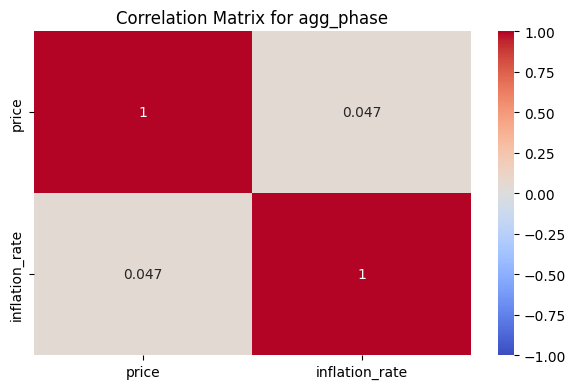

Correlation matrix for agg_geo:
                          price  distance_from_central  inflation_rate
price                  1.000000              -0.086431        0.098921
distance_from_central -0.086431               1.000000       -0.004120
inflation_rate         0.098921              -0.004120        1.000000


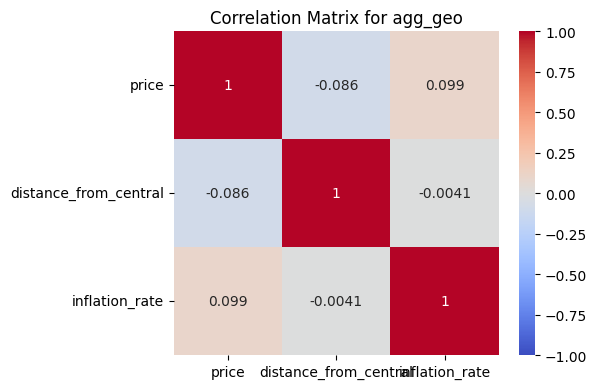

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# ---- For agg_phase ----
numeric_cols_phase = ['price', 'inflation_rate']

# Compute the correlation matrix for agg_phase
corr_phase = agg_phase[numeric_cols_phase].corr()
print("Correlation matrix for agg_phase:")
print(corr_phase)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_phase, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for agg_phase")
plt.tight_layout()
plt.show()

# ---- For agg_geo ----
numeric_cols_geo = ['price', 'distance_from_central', 'inflation_rate']

# Compute the correlation matrix for agg_geo
corr_geo = agg_geo[numeric_cols_geo].corr()
print("Correlation matrix for agg_geo:")
print(corr_geo)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_geo, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for agg_geo")
plt.tight_layout()
plt.show()


agg_phase - Summary Statistics:
             price  inflation_rate
count  3584.000000     3584.000000
mean    129.362671        0.838640
std     113.459968        9.873277
min       5.581765      -40.755665
25%      45.461200       -2.974440
50%      87.624675        0.159172
75%     181.750019        3.977926
max     655.569375      151.349506


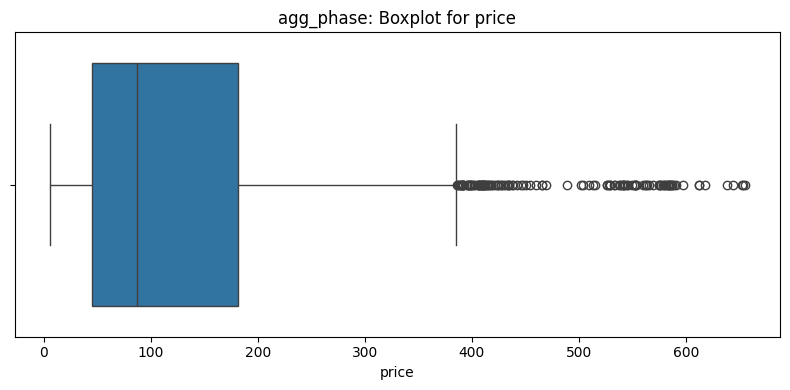

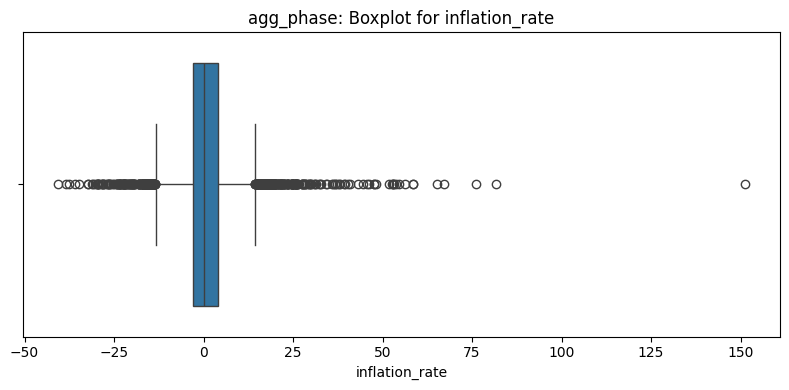

Outlier counts for agg_phase:
price: 129 outliers
inflation_rate: 390 outliers

agg_geo - Summary Statistics:
               price  inflation_rate
count  100432.000000   100432.000000
mean      129.299350        3.788527
std       117.918511       28.709363
min         4.540000      -91.134078
25%        46.367500       -9.652474
50%        92.330000        0.050694
75%       174.835000       11.776132
max      1216.670000      918.235749


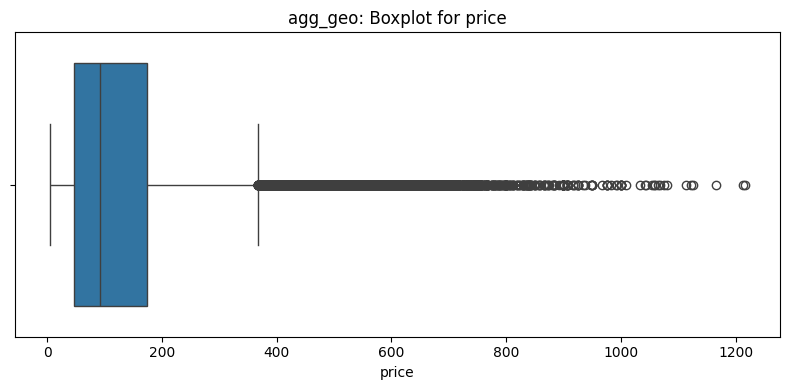

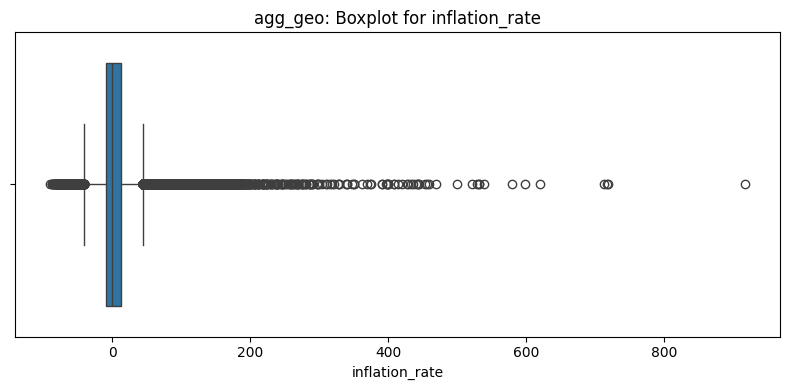

Outlier counts for agg_geo:
price: 4527 outliers
inflation_rate: 8359 outliers


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].count()

# ================================================
# For agg_phase
# ================================================
# Assume agg_phase has at least the following numeric columns:
numeric_cols_phase = ['price', 'inflation_rate']

print("agg_phase - Summary Statistics:")
print(agg_phase[numeric_cols_phase].describe())

# Create boxplots for each numeric column in agg_phase
for col in numeric_cols_phase:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=agg_phase[col])
    plt.title(f"agg_phase: Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
# Count outliers for each numeric column in agg_phase
print("Outlier counts for agg_phase:")
for col in numeric_cols_phase:
    outlier_count = count_outliers(agg_phase[col])
    print(f"{col}: {outlier_count} outliers")

# ================================================
# For agg_geo
# ================================================
# Assume agg_geo has at least the following numeric columns:
numeric_cols_geo = ['price', 'inflation_rate']

print("\nagg_geo - Summary Statistics:")
print(agg_geo[numeric_cols_geo].describe())

# Create boxplots for each numeric column in agg_geo
for col in numeric_cols_geo:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=agg_geo[col])
    plt.title(f"agg_geo: Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
# Count outliers for each numeric column in agg_geo
print("Outlier counts for agg_geo:")
for col in numeric_cols_geo:
    outlier_count = count_outliers(agg_geo[col])
    print(f"{col}: {outlier_count} outliers")
